In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from cartopy import crs as ccrs
# cartopy was previously having a weird conflict with shapely
# fixed with an older version "pip install shapely==1.8.5 --user --force-reinstall" 
import matplotlib.colors as colors
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.patches as mpatches

In [3]:
from cmcrameri import cm

In [4]:
df_pca_kmeans = pd.read_csv("pca7_cluster5_2.csv")
df_pca_kmeans

,Unnamed: 0,Coal_Share_PhasedOut,Coal_Gen_Decline_Perc,Gas_Gen_Decline_Perc,num_supply_policy,WDI_Coal_El_.,WDI_NG_El_.,Share_VRE_Gen,Coal_logCurrent_MW,Gas_logCurrent_MW,...,0,1,2,3,4,5,6,Segment K-means PCA,cntry,year
0,AGO-2017,-0.282271,-0.385317,-0.307092,1.603317,-0.807329,-0.272712,-0.396314,-1.278531,-0.131304,...,-1.106275,0.949569,-0.757268,0.711425,-0.543739,1.240417,0.977352,1,AGO,2017
1,AGO-2018,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.406118,-0.401152,-1.278531,-0.131304,...,-0.392291,1.058590,-0.839246,0.111290,-1.400560,0.685661,-0.008270,1,AGO,2018
2,AGO-2019,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.260609,-0.405162,-1.278531,-0.131304,...,-0.751716,1.122318,-0.856642,0.426698,-1.252600,1.274748,0.457875,1,AGO,2019
3,AGO-2020,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.296971,-0.406599,-1.278531,-0.131304,...,-0.679614,1.098374,-0.861544,0.363532,-1.261488,1.163414,0.397091,1,AGO,2020
4,AGO-2021,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.246891,-0.406418,-1.278531,-0.131304,...,-0.936670,1.046424,-0.606880,0.781057,-0.717400,1.244098,1.147634,1,AGO,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,ZWE-2017,-0.282271,-0.385317,-0.307092,-0.023948,0.777035,-1.003199,-0.404209,0.391204,-2.275119,...,-0.596300,-2.027587,-1.182324,1.136539,0.055184,0.012660,0.098402,0,ZWE,2017
2782,ZWE-2018,-0.282271,-0.385317,-0.307092,0.247263,0.740939,-1.003199,-0.391633,0.391204,-2.275119,...,-0.883649,-1.903669,-1.304472,1.485608,-0.171737,0.886731,0.372182,0,ZWE,2018
2783,ZWE-2019,-0.282271,-0.385317,-0.307092,0.518474,0.886684,-1.003199,-0.369056,0.391204,-2.275119,...,-0.142663,-1.902657,-1.297691,0.777994,-0.761659,-0.034533,-0.548157,0,ZWE,2019
2784,ZWE-2020,-0.282271,-0.385317,-0.307092,0.518474,0.902496,-1.003199,-0.364249,0.391204,-2.275119,...,-0.359231,-1.946274,-1.259778,1.056791,-0.508273,0.268713,-0.071359,0,ZWE,2020


In [5]:
year_list = [1995,2000,2005,2010,2015,2020]
for yr in year_list:
    these_years = df_pca_kmeans[df_pca_kmeans["year"].isin(np.arange(5)+yr)].index
    if yr != 2020:
        df_pca_kmeans.loc[these_years,"year_group"] = str(yr)+"-"+str(yr+4)
    else:
        df_pca_kmeans.loc[these_years,"year_group"] = "2020 onwards"
df_pca_kmeans

,Unnamed: 0,Coal_Share_PhasedOut,Coal_Gen_Decline_Perc,Gas_Gen_Decline_Perc,num_supply_policy,WDI_Coal_El_.,WDI_NG_El_.,Share_VRE_Gen,Coal_logCurrent_MW,Gas_logCurrent_MW,...,1,2,3,4,5,6,Segment K-means PCA,cntry,year,year_group
0,AGO-2017,-0.282271,-0.385317,-0.307092,1.603317,-0.807329,-0.272712,-0.396314,-1.278531,-0.131304,...,0.949569,-0.757268,0.711425,-0.543739,1.240417,0.977352,1,AGO,2017,2015-2019
1,AGO-2018,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.406118,-0.401152,-1.278531,-0.131304,...,1.058590,-0.839246,0.111290,-1.400560,0.685661,-0.008270,1,AGO,2018,2015-2019
2,AGO-2019,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.260609,-0.405162,-1.278531,-0.131304,...,1.122318,-0.856642,0.426698,-1.252600,1.274748,0.457875,1,AGO,2019,2015-2019
3,AGO-2020,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.296971,-0.406599,-1.278531,-0.131304,...,1.098374,-0.861544,0.363532,-1.261488,1.163414,0.397091,1,AGO,2020,2020 onwards
4,AGO-2021,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.246891,-0.406418,-1.278531,-0.131304,...,1.046424,-0.606880,0.781057,-0.717400,1.244098,1.147634,1,AGO,2021,2020 onwards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,ZWE-2017,-0.282271,-0.385317,-0.307092,-0.023948,0.777035,-1.003199,-0.404209,0.391204,-2.275119,...,-2.027587,-1.182324,1.136539,0.055184,0.012660,0.098402,0,ZWE,2017,2015-2019
2782,ZWE-2018,-0.282271,-0.385317,-0.307092,0.247263,0.740939,-1.003199,-0.391633,0.391204,-2.275119,...,-1.903669,-1.304472,1.485608,-0.171737,0.886731,0.372182,0,ZWE,2018,2015-2019
2783,ZWE-2019,-0.282271,-0.385317,-0.307092,0.518474,0.886684,-1.003199,-0.369056,0.391204,-2.275119,...,-1.902657,-1.297691,0.777994,-0.761659,-0.034533,-0.548157,0,ZWE,2019,2015-2019
2784,ZWE-2020,-0.282271,-0.385317,-0.307092,0.518474,0.902496,-1.003199,-0.364249,0.391204,-2.275119,...,-1.946274,-1.259778,1.056791,-0.508273,0.268713,-0.071359,0,ZWE,2020,2020 onwards


In [6]:
df_pca_mode = df_pca_kmeans.groupby(["cntry","year_group"])["Segment K-means PCA"].agg(pd.Series.mode).to_frame()
df_pca_mode = df_pca_mode.reset_index()
df_pca_mode

,cntry,year_group,Segment K-means PCA
0,AGO,2015-2019,1
1,AGO,2020 onwards,1
2,ARE,1995-1999,1
3,ARE,2000-2004,1
4,ARE,2005-2009,1
...,...,...,...
617,ZWE,2000-2004,0
618,ZWE,2005-2009,0
619,ZWE,2010-2014,0
620,ZWE,2015-2019,0


In [7]:
df_pca_mode = df_pca_kmeans.groupby(["cntry","year_group"]).agg(lambda x: x.value_counts().index[0])
df_pca_mode = df_pca_mode.reset_index()
df_pca_mode

,cntry,year_group,Unnamed: 0,Coal_Share_PhasedOut,Coal_Gen_Decline_Perc,Gas_Gen_Decline_Perc,num_supply_policy,WDI_Coal_El_.,WDI_NG_El_.,Share_VRE_Gen,...,R_Choice,0,1,2,3,4,5,6,Segment K-means PCA,year
0,AGO,2015-2019,AGO-2017,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.272712,-0.396314,...,0.0,-1.106275,0.949569,-0.757268,0.711425,-0.543739,1.240417,0.977352,1,2017
1,AGO,2020 onwards,AGO-2020,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.296971,-0.406599,...,0.0,-0.679614,1.098374,-0.861544,0.363532,-1.261488,1.163414,0.397091,1,2020
2,ARE,1995-1999,ARE-1995,-0.282271,-0.385317,-0.307092,-0.837580,-0.807329,2.091958,-0.425184,...,0.0,-1.833989,1.746308,0.077172,-0.487023,0.982338,-0.664197,0.686666,1,1995
3,ARE,2000-2004,ARE-2000,-0.282271,-0.385317,-0.307092,-0.837580,-0.807329,2.092499,-0.425184,...,0.0,-2.237408,1.941511,-0.085035,-0.228864,0.562230,0.369458,0.567325,1,2000
4,ARE,2005-2009,ARE-2005,-0.282271,-0.385317,-0.307092,-0.837580,-0.807329,2.122978,-0.425184,...,0.0,-1.619923,2.000113,0.114080,-0.918812,0.413951,-0.771521,-0.082778,1,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,ZWE,2000-2004,ZWE-2000,-0.282271,-0.385317,-0.307092,-0.837580,1.251585,-1.003199,-0.425184,...,0.0,-1.206397,-2.344739,-1.288927,1.492881,0.229726,0.622909,0.010161,0,2000
618,ZWE,2005-2009,ZWE-2005,-0.282271,-0.385317,-0.307092,-0.566369,1.017004,-1.003199,-0.425184,...,0.0,-0.762873,-2.293926,-1.095619,1.196419,0.498680,-0.236232,0.192470,0,2005
619,ZWE,2010-2014,ZWE-2010,-0.282271,-0.385317,-0.307092,-0.023948,0.415550,-1.003199,-0.425184,...,0.0,-0.913437,-1.604950,-1.684614,0.891406,-0.984966,0.681220,-1.556038,0,2010
620,ZWE,2015-2019,ZWE-2015,-0.282271,-0.385317,-0.307092,-0.023948,0.996553,-1.003199,-0.408766,...,0.0,-0.645471,-2.188910,-1.110884,1.263767,0.237785,0.059883,0.404112,0,2015


In [8]:
df_pca_mode["Segment K-means PCA"].unique()

array([1, 3, 4, 0, 2], dtype=int64)

https://gis.stackexchange.com/questions/450836/robinson-projection-in-geopandas 

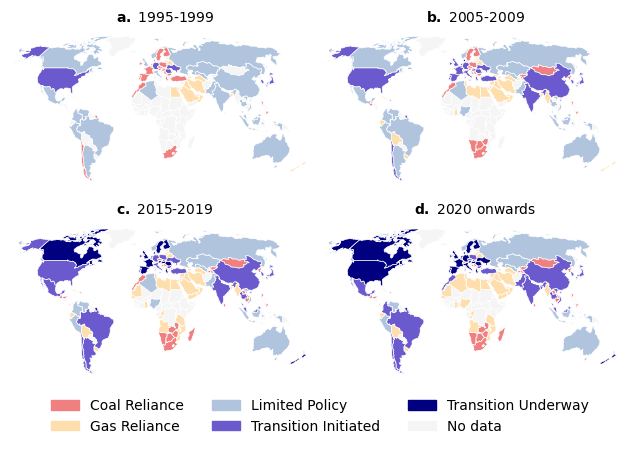

In [9]:
fig, axs = plt.subplots(2,2,figsize=(8,5))
color_dict = {0:"lightcoral",1:"navajowhite",2:"navy",
              3:"lightsteelblue",4:"slateblue",5:"whitesmoke"}
fig.subplots_adjust(wspace=0,hspace=0)
#df_pca_kmeans["Segment K-means PCA"] = df_pca_kmeans["Segment K-means PCA"].fillna(5)
yr_group_list = ['1995-1999', '2005-2009','2015-2019','2020 onwards']
index_list = [r"$\bf{a. }$",r"$\bf{b. }$",r"$\bf{c. }$",r"$\bf{d. }$"]
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
robinson = ccrs.Robinson().proj4_init

for i in np.arange(len(yr_group_list)):
    ax = axs.flatten()[i]
    yr_group = yr_group_list[i]
    ax.set_title(index_list[i]+" "+yr_group,fontsize=10)    
    world_data = pd.merge(world,df_pca_mode.query("year_group==@yr_group")[["Segment K-means PCA","cntry"]],
         left_on="iso_a3",right_on = "cntry",how="left")
    world_data["Segment K-means PCA"] = world_data["Segment K-means PCA"].fillna(5)
    world_data.to_crs(robinson).plot(column="Segment K-means PCA",edgecolor="white",linewidths=0.5,
                                    cmap=colors.ListedColormap(list(color_dict.values())),ax=ax)
    ax.set_xlim(-13500000,17000000)
    ax.set_ylim(-6900000,9000000)
    ax.axis('off')
#axs.flatten()[-1]
#patch = mpatches.Patch(color='grey', label='manual patch')  
plt.legend(handles=[mpatches.Patch(color="lightcoral", label='Coal Reliance'), #0
                   mpatches.Patch(color="navajowhite", label='Gas Reliance'),#1
                    mpatches.Patch(color="lightsteelblue", label='Limited Policy'),#3
                    mpatches.Patch(color="slateblue", label='Transition Initiated'),#4
                    mpatches.Patch(color="navy", label='Transition Underway'),#2
                   mpatches.Patch(color='whitesmoke', label='No data')],
          loc='center', bbox_to_anchor=(0, -0.2),frameon=False,ncol=3)
fig.savefig("world_map_clusters.png",dpi=600, bbox_inches='tight')
fig.savefig("world_map_clusters.pdf", bbox_inches='tight')